In [228]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading the excel and making a dataframe

In [5]:
df = pd.read_excel('uncleaned_bike_sales_data.xlsx')
df.columns

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [206]:
df.head(3)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  88 non-null     float64       
 3   Month                89 non-null     object        
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age_Group            88 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     object        
 11  Sub_Category         89 non-null     object        
 12  Product_Description  88 non-null     object        
 13  Order_Quantity       88 non-null     

In [208]:
df.describe()

,Sales_Order #,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,89.000000,89,88.000000,89.0,89.000000,88.000000,89.000000,89.000000,89.000000,89.000000,89.00000
mean,261738.067416,2021-12-13 10:31:00.674157312,13.534091,2021.0,34.202247,2.125000,1052.247191,1940.943820,1848.887640,2204.235955,4043.94382
min,261695.000000,2021-12-01 00:00:00,1.000000,2021.0,17.000000,1.000000,0.000000,0.000000,245.000000,0.000000,0.00000
25%,261716.000000,2021-12-08 00:00:00,8.750000,2021.0,30.000000,1.000000,420.000000,2295.000000,1043.000000,1252.000000,2295.00000
50%,261738.000000,2021-12-13 00:00:00,13.500000,2021.0,35.000000,2.000000,1252.000000,2295.000000,1054.000000,1266.000000,2320.00000
75%,261760.000000,2021-12-19 00:00:00,19.000000,2021.0,38.000000,3.000000,1266.000000,2320.000000,2954.000000,3756.000000,6750.00000
max,261782.000000,2021-12-24 00:00:00,24.000000,2021.0,63.000000,4.000000,1912.000000,3400.000000,5908.000000,7592.000000,13500.00000
std,25.729713,NaN,6.391353,0.0,8.090651,1.239322,440.499001,789.955743,1394.401162,1730.330926,3139.75858


finding number of null entries

In [209]:
df.isnull().sum()

Sales_Order #          0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         1
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

In [210]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Day', 'Age_Group', 'Product_Description', 'Order_Quantity']

creating a heatmap to visualize the population of null or missing values

<Axes: >

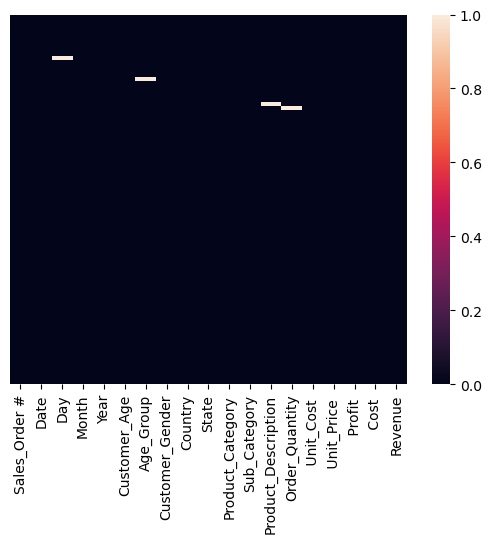

In [211]:
sns.heatmap(df.isnull(),yticklabels=False, cbar='viridis')

finding all null entries
(only do it when there are limited null entries)

In [212]:
null_order_quantity = df[df['Order_Quantity'].isnull()]
print(null_order_quantity)


    Sales_Order #       Date  Day     Month  Year  Customer_Age  \
22         261716 2021-12-08  8.0  December  2021            35   

         Age_Group Customer_Gender        Country       State  \
22  Adults (35-64)               F  United States  California   

   Product_Category    Sub_Category     Product_Description  Order_Quantity  \
22            Bikes  Mountain Bikes  Mountain-500 Black, 42             NaN   

     Unit_Cost    Unit_Price    Profit    Cost   Revenue  
22          295           540       245       0        0  


replacing the null Order_Quantity with the mode to take the most expected value

In [213]:
df2 = df.copy()
mode_value = df['Order_Quantity'].mode()[0]
df2['Order_Quantity'] = df2['Order_Quantity'].fillna(mode_value)
df2.isnull().sum()

Sales_Order #          0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         0
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

We resolved the null value of order_quanity using mode as it is an independent data type thus we could not arrive at an exact value of the missing null, thus choosing mode is the most avg solution for now

In [214]:
#fill the null value of order quantity with the mode of orders where country is
#  United States, gender is F and Age category is adult(35-64)
filtered_df = df[(df['Country'] == 'United States') & (df['Customer_Gender'] == 'F') & (df['Age_Group'] == 'Adults (35-64)')]
average_order_quantity = filtered_df['Order_Quantity'].mode().values[0]
print(average_order_quantity)

1.0


replacing th product discription and day by the previous entries value using forwardfill and we are considering them as non essential features in this example

In [ ]:

df3['Product_Description'] = df3['Product_Description'].ffill()
df3['Day'] = df3['Day'].ffill()

checking left null values

In [215]:
df3 = df.copy()
df3['Order_Quantity'] = df3['Order_Quantity'].fillna(average_order_quantity)
df3.isnull().sum()

Sales_Order #          0
Date                   0
Day                    0
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    0
Order_Quantity         0
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

After further thinking, it was decided to fill the null value of order quantity with the mode of orders where country is United States, gender is F and Age category is adult(35-64)

note this is implementable only becuase we have one entry with null value

however a similar version can be made to automate the proccess of extracting the needed coulums from table then running mode function on the newly found data

In [216]:
null_age_category = df['Age_Group'].isnull()

# Replace null values in 'age category' based on 'age' column
df3.loc[null_age_category, 'Age_Group'] = df.loc[null_age_category, 'Customer_Age'].apply(lambda age: 
    'Youth (<25)' if age is not None and age < 25 else
    'Young Adults (25-34)' if age is not None and 25 <= age <= 34 else
    'Adults (35-64)' if age is not None and age >= 35 else
    None  # Handle cases where age is None or doesn't fit any category
)

df3.isnull().sum()

Sales_Order #          0
Date                   0
Day                    0
Month                  0
Year                   0
Customer_Age           0
Age_Group              0
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    0
Order_Quantity         0
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

here we replaced the null age_group by replacing it with the help of the coustomer_age coloum

creating a funtion to automate the age group filling

In [226]:
def categorize_age(age):
    if age < 25:
        return 0
    elif 25 <= age <= 34:
        return 1
    elif 35 <= age <= 64:
        return 2
    elif age >= 65:
        return 3
    else:
        return None 


df3['age_category'] = df3['Customer_Age'].apply(categorize_age)

print(df3[['Sales_Order #', 'age_category']])

    Sales_Order #  age_category
0          261695             2
1          261695             2
2          261697             2
3          261698             1
4          261699             2
..            ...           ...
84         261778             2
85         261779             1
86         261780             1
87         261781             2
88         261782             2

[89 rows x 2 columns]


In [217]:
df3.Country.value_counts()

Country
United States     30
Australia         27
United Kingdom     9
France             8
Germany            6
Canada             6
 United States     1
United  States     1
United States      1
Name: count, dtype: int64

standardising capital and small words and letters

In [218]:
#standardising the capital and small variations of country names
df3['Country'] = df3['Country'].str.title().str.strip()

removing the extra spacing

In [219]:
#funtion to remove the extra spacing between 2 words in country names

def normalize_country_name(country):
    # Remove leading/trailing spaces and replace multiple spaces with a single space
    country = ' '.join(country.split())
    # Convert to lower case and replace specific standardization
    if country.lower() == 'united states':
        return 'United States'
    else:
        return country.title()

removing the extra spaces

In [220]:
#calling the space removing function to country coloumn
df3['Country'] = df3['Country'].apply(normalize_country_name)

pie chart showing order quantity percentage of each contie

In [221]:
country_names=df3.Country.value_counts().index
country_val=df3.Country.value_counts().value

([<matplotlib.patches.Wedge at 0x1af597e4c80>,
 [Text(0.4343668818182189, 1.0106064575192053, 'United States'),
  Text(-1.0890533667769886, -0.1547991095313739, 'Australia'),
  Text(-0.17399525991062548, -1.0861517617389542, 'United Kingdom'),
  Text(0.4697620013988918, -0.9946475064271301, 'France'),
  Text(0.8853319167495454, -0.6528302973856042, 'Germany'),
  Text(1.075421165601363, -0.23123433260786744, 'Canada')],
 [Text(0.23692739008266483, 0.5512398859195665, '37.08%'),
  Text(-0.5940291091510846, -0.08443587792620394, '30.34%'),
  Text(-0.0949065054057957, -0.592446415493975, '10.11%'),
  Text(0.25623381894485003, -0.5425350035057073, '8.99%'),
  Text(0.4829083182270247, -0.3560892531194204, '6.74%'),
  Text(0.5865933630552889, -0.12612781778610951, '6.74%')])

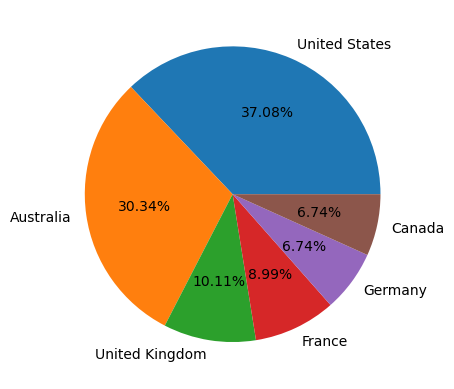

In [222]:
plt.pie(country_val,labels=country_names,autopct='%1.2f%%')

Observation: United States and Australia result to about 60 percent of the coustomers

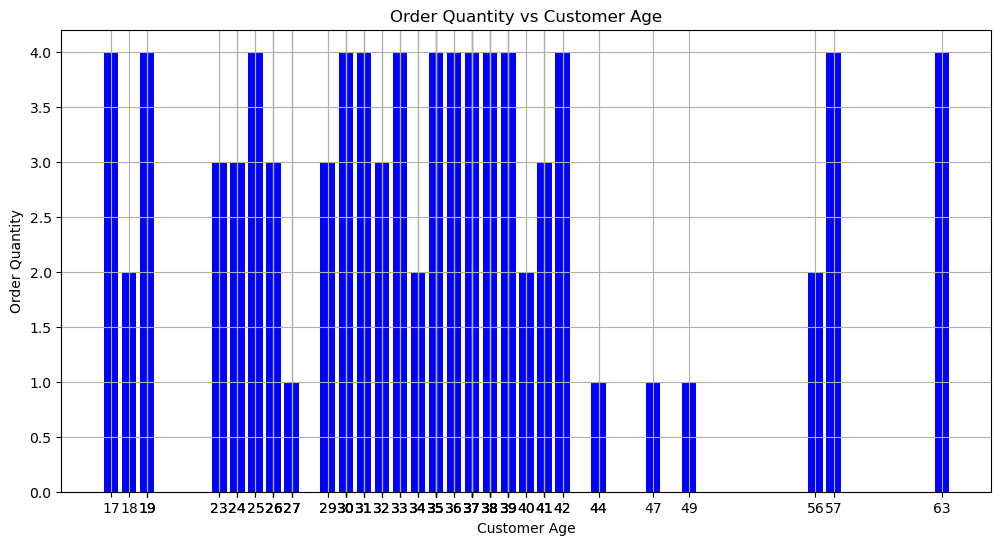

In [243]:

plt.bar(df3['Customer_Age'], df3['Order_Quantity'], color='blue')
plt.xlabel('Customer Age')
plt.ylabel('Order Quantity')
plt.title('Order Quantity vs Customer Age')
plt.xticks(df3['Customer_Age'])
plt.grid(True)
plt.show()

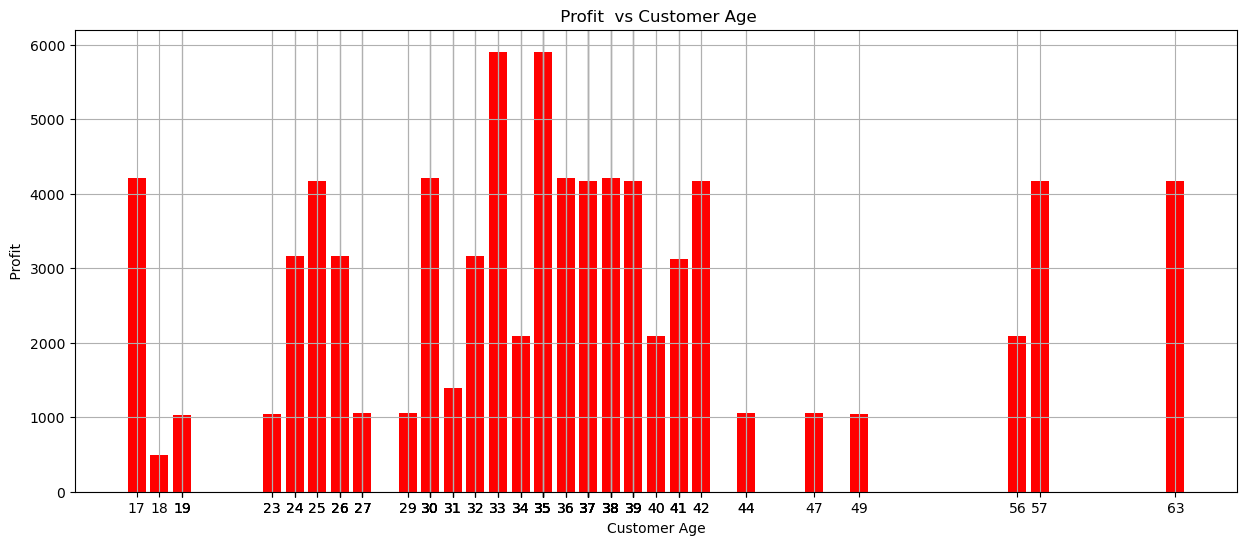

In [246]:
matplotlib.rcParams['figure.figsize']=(15,6)
plt.bar(df3['Customer_Age'], df3[' Profit '], color='red')
plt.xlabel('Customer Age')
plt.ylabel(' Profit ')
plt.title(' Profit  vs Customer Age')
plt.xticks(df3['Customer_Age'])
plt.grid(True)
plt.show()

<Axes: xlabel='State', ylabel='Count'>

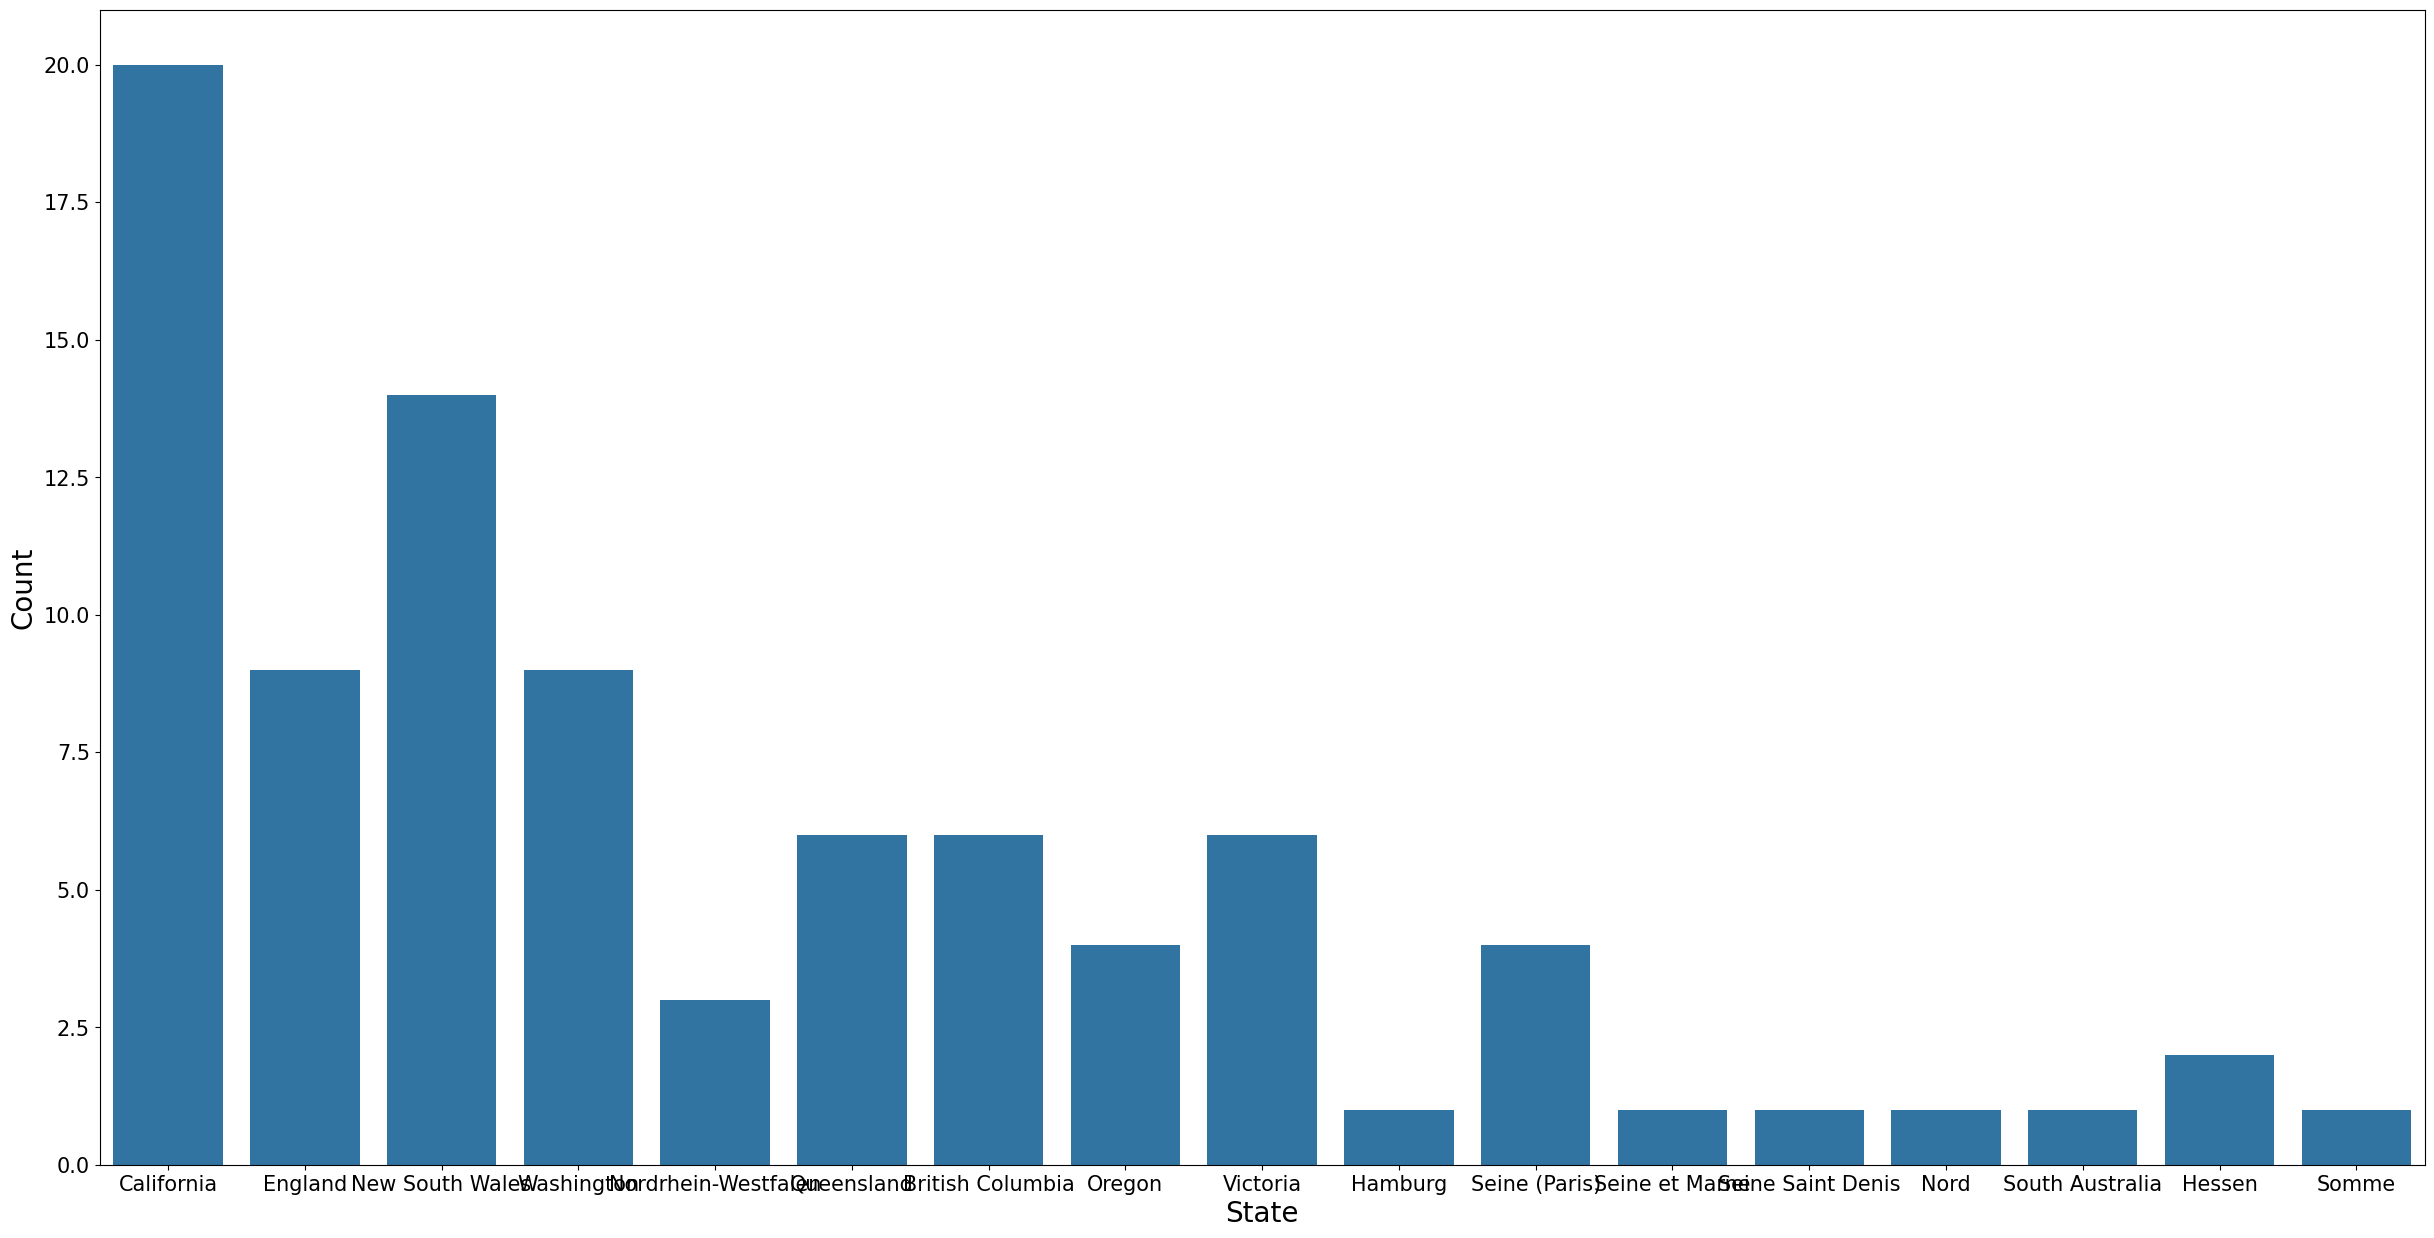

In [254]:
matplotlib.rcParams['figure.figsize']=(30,15)
plt.xlabel('State', fontsize=20)  # Example font size 20
plt.ylabel('Count', fontsize=20)  # Example font size 20

# Adjusting font size for tick labels on both axes
plt.xticks(fontsize=15)  # Example font size 15 for x-axis tick labels
plt.yticks(fontsize=15)  # Example font size 15 for y-axis tick labels
units_sold = pd.DataFrame(df3)
sns.countplot(x='State',data=units_sold)

Making box plots to find outliers

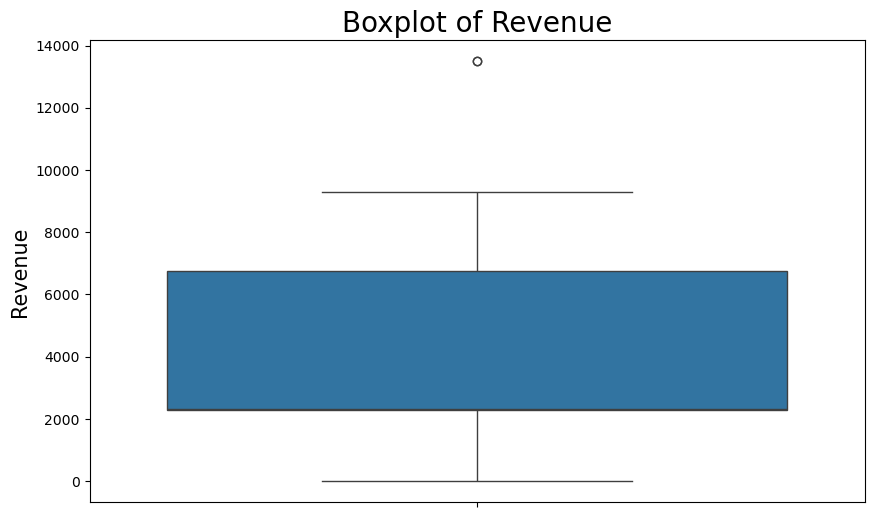

In [255]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(y='Revenue', data=df3)

# Adjusting labels and title
plt.ylabel('Revenue', fontsize=15)
plt.title('Boxplot of Revenue', fontsize=20)

# Show the plot
plt.show()

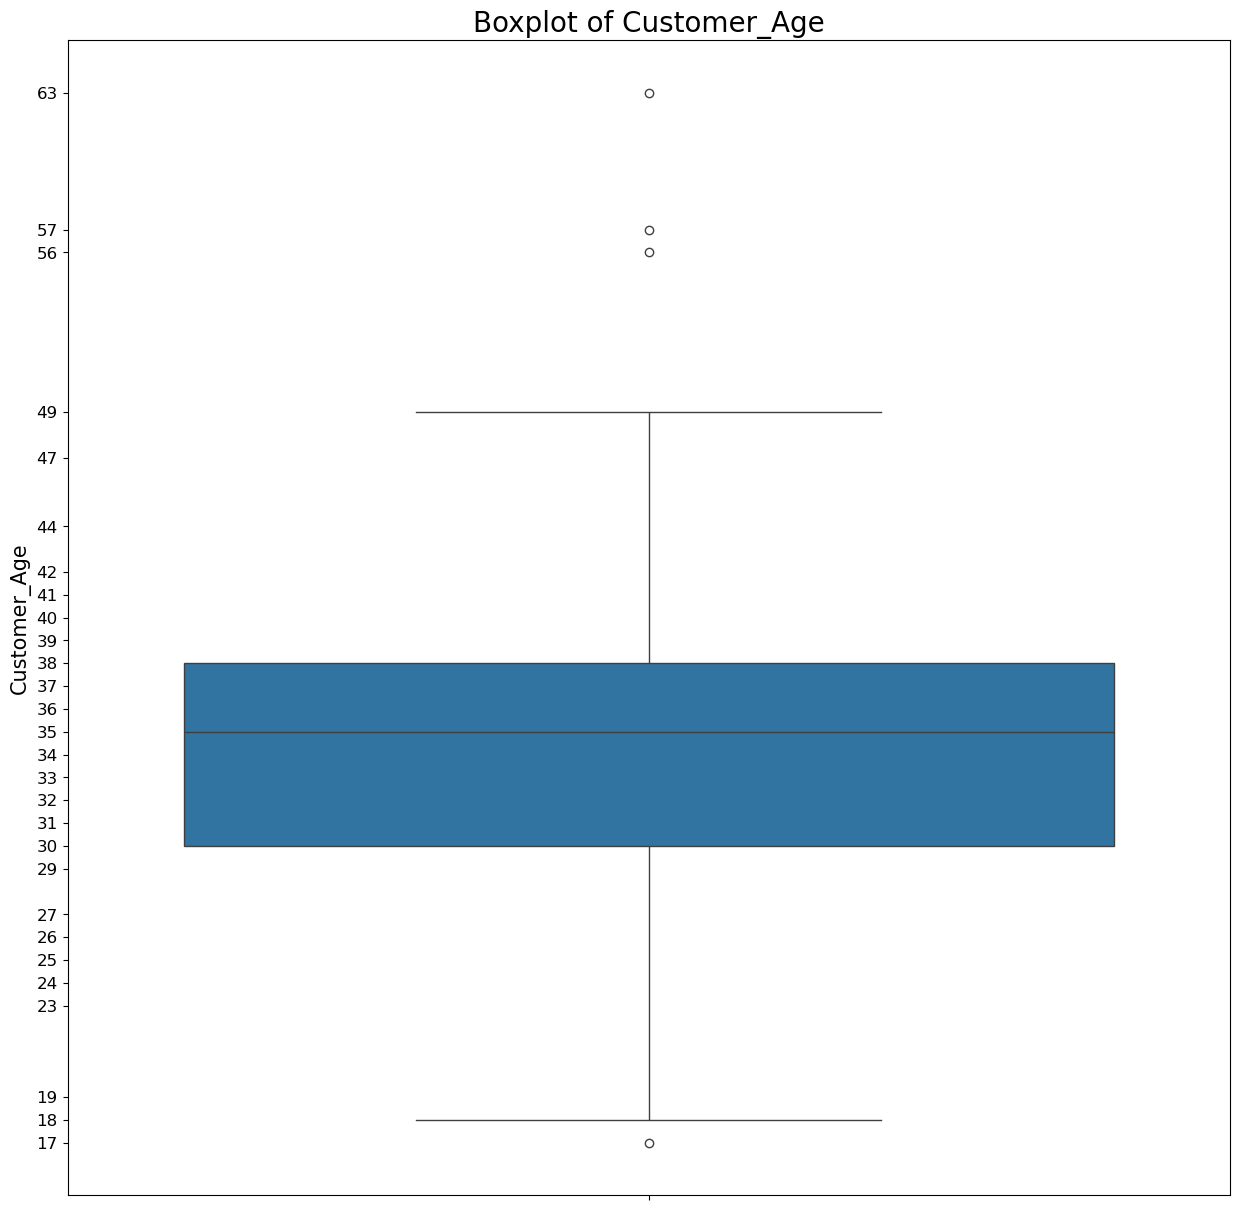

In [258]:
plt.figure(figsize=(15,15))

# Create the boxplot
sns.boxplot(y='Customer_Age', data=df3)

# Adjusting labels and title
plt.ylabel('Customer_Age', fontsize=15)
plt.title('Boxplot of Customer_Age', fontsize=20)
unique_ages = sorted(df3['Customer_Age'].unique())
plt.yticks(unique_ages, fontsize=12)
# Show the plot
plt.show()